In [182]:
# Dependencies for this notebook
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

# Ignore warning for this project
import warnings
warnings.filterwarnings("ignore")

import os
import joblib

In [183]:
# Load the dataset
df = pd.read_csv("data/input.csv", sep=";")
df.head()

,qm_spec_id,Line 1,Line 2,Line 3,Density_Target,Dry_Feed_Rate_PID.OUT,Dry_Feed_Rate_PID.SP
0,200,0,0,1,440,0,7000
1,37,0,1,0,528,24,6000
2,503,0,1,0,384,24,6000
3,509,0,1,0,456,24,6000
4,558,0,1,0,456,24,6000


,qm_spec_id,Line 1,Line 2,Line 3,Density_Target,Dry_Feed_Rate_PID.OUT,Dry_Feed_Rate_PID.SP
58,475,1,0,0,456,26,7000
59,476,1,0,0,456,26,7000
66,557,1,0,0,368,26,5500
67,557,1,0,0,368,26,7000
89,199,1,0,0,528,30,6000


In [184]:
df = df.drop(["qm_spec_id"], axis=1)
df.head()

,Line 1,Line 2,Line 3,Density_Target,Dry_Feed_Rate_PID.OUT,Dry_Feed_Rate_PID.SP
0,0,0,1,440,0,7000
1,0,1,0,528,24,6000
2,0,1,0,384,24,6000
3,0,1,0,456,24,6000
4,0,1,0,456,24,6000


In [187]:
validation = df["Dry_Feed_Rate_PID.OUT"]
input = df[["Density_Target", "Dry_Feed_Rate_PID.SP", "Line 1", "Line 2","Line 3"]]

input.head()



SyntaxError: invalid syntax. Perhaps you forgot a comma? (473254277.py, line 2)

In [186]:
scaler = joblib.load("out/scaler.pkl")
model = joblib.load("out/trained_model.pkl")

scaled_input = scaler.transform(input)
predictions = model.predict(scaled_input)

output = pd.DataFrame({ 
	"Density_Target":  df["Density_Target"], 
	"Dry_Feed_Rate_PID.SP": df["Dry_Feed_Rate_PID.SP"],
	"Prediction.OUT": predictions, 
	"Validation.OUT": validation 
})

output.head()

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Line 1
- Line 2
- Line 3


In [ ]:
output.to_csv("out/predictions.csv", index=False, sep=";", decimal=",")

<Axes: xlabel='Prediction.OUT', ylabel='Validation.OUT'>

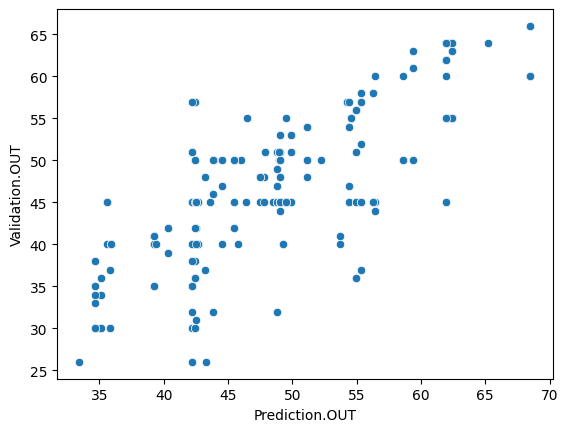

In [ ]:
sns.scatterplot(output, x="Prediction.OUT", y="Validation.OUT")